# Problem Statement


WHO is a specialized agency of the UN which is concerned with the world population health. Based upon the various parameters, WHO allocates budget for various areas to conduct various campaigns/initiatives to improve healthcare. Annual salary is an important variable which is considered to decide budget to be allocated for an area.  
  
We have a data which contains information about 32561 samples and 15 continuous and categorical variables. Extraction of data was done from 1994 Census dataset.  
  
The goal here is to build a binary model to predict whether the salary is >50K or <50K.

## Data Dictionary

1. <b>age:</b> age  
2. <b>workclass:</b> workclass  
3. <b>fnlwgt:</b> samplting weight  
4. <b>education:</b> highest education  
5. <b>education-no. of years:</b> number of years of education in total  
6. <b>marrital status:</b> marrital status  
7. <b>occupation:</b> occupation  
8. <b>relationship:</b> relationship  
9. <b>race:</b> race  
10. <b>sex:</b> sex  
11. <b>capital gain:</b> income from investment sources other than salary/wages  
12. <b>capital loss:</b> income from investment sources other than salary/wages  
13. <b>working hours:</b> nummber of working hours per week  
14. <b>native-country:</b> native country  
15. <b>salary:</b> salary  


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [0]:
adult_data=pd.read_csv("adult.data.csv")

### EDA

In [0]:
adult_data.head()

,age,workclass,fnlwgt,education,education-no. of years,marrital status,occupation,relationship,race,sex,capital gain,capital loss,working hours per week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                       32561 non-null int64
workclass                 32561 non-null object
fnlwgt                    32561 non-null int64
education                 32561 non-null object
education-no. of years    32561 non-null int64
marrital status           32561 non-null object
occupation                32561 non-null object
relationship              32561 non-null object
race                      32561 non-null object
sex                       32561 non-null object
capital gain              32561 non-null int64
capital loss              32561 non-null int64
working hours per week    32561 non-null int64
native-country            32561 non-null object
salary                    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are no missing values. 6 variables are numeric and remaining categorical. Categorical variables are not in encoded format

### Check for duplicate data

In [0]:
dups = adult_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(adult_data.shape)

Number of duplicate rows = 24
(32561, 15)


There are 24 duplicates that needs to be removed

In [0]:
adult_data.drop_duplicates(inplace=True) 

In [0]:
dups = adult_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(adult_data.shape)

Number of duplicate rows = 0
(32537, 15)


### Geting unique counts of all Objects

In [0]:
adult_data.salary.value_counts(normalize=True)

 <=50K    0.759074
 >50K     0.240926
Name: salary, dtype: float64

In [0]:
for feature in adult_data.columns: 
    if adult_data[feature].dtype == 'object': 
        print(feature)
        print(adult_data[feature].value_counts())
        print('\n')
        

workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


education
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64


marrital status
 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marrital status, dtype: int64


occupation
 Prof-specialty 

workclass, occupation,native-country has ?  
Since, high number of cases have ?, we will convert them into a new level

In [0]:
# Replace ? to new Unk category
adult_data.workclass=adult_data.workclass.str.replace('?', 'Unk')
adult_data.occupation = adult_data.occupation.str.replace('?', 'Unk')
adult_data['native-country'] = adult_data['native-country'].str.replace('?', 'Unk')

In [0]:
adult_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32537,NaN,NaN,NaN,38.5855,13.638,17,28,37,48,90
workclass,32537,9,Private,22673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32537,NaN,NaN,NaN,189781,105556,12285,117827,178356,236993,1.48470e+06
education,32537,16,HS-grad,10494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-no. of years,32537,NaN,NaN,NaN,10.0818,2.57163,1,9,10,12,16
marrital status,32537,7,Married-civ-spouse,14970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32537,15,Prof-specialty,4136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32537,6,Husband,13187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32537,5,White,27795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32537,2,Male,21775,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for Outliers

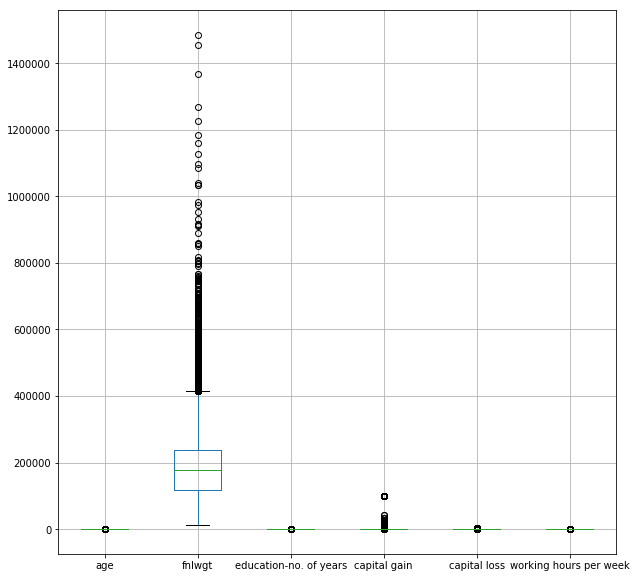

In [0]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
adult_data.boxplot()

### Treating Outliers

In [0]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [0]:
for column in adult_data.columns:
    if adult_data[column].dtype != 'object': 
        lr,ur=remove_outlier(adult_data[column])
        adult_data[column]=np.where(adult_data[column]>ur,ur,adult_data[column])
        adult_data[column]=np.where(adult_data[column]<lr,lr,adult_data[column])

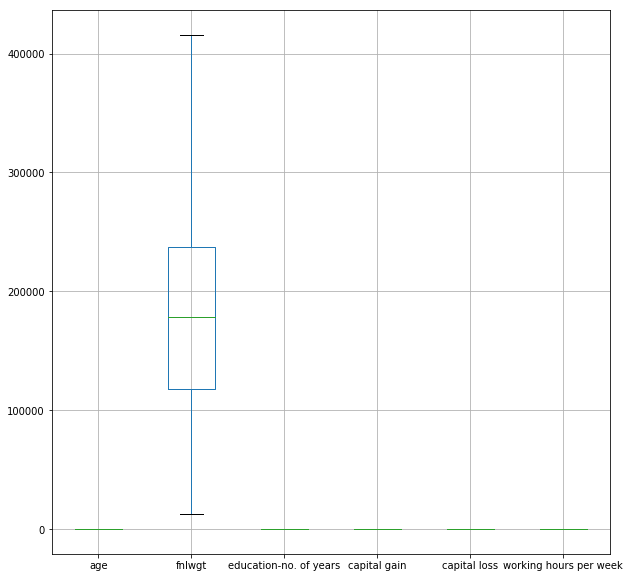

In [0]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
adult_data.boxplot()

### Checking for Correlations

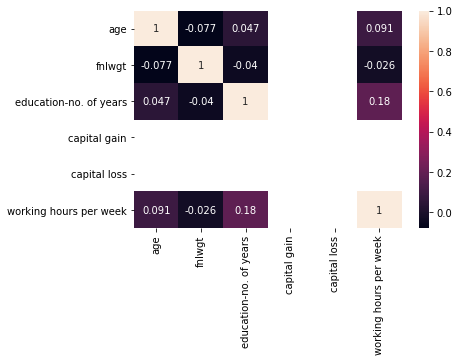

In [0]:
sns.heatmap(adult_data.corr(), annot=True)

In [0]:
adult_data.describe()

,age,fnlwgt,education-no. of years,capital gain,capital loss,working hours per week
count,32537.000000,32537.000000,32537.000000,32537.0,32537.0,32537.000000
mean,38.559855,186824.961736,10.125165,0.0,0.0,41.203246
std,13.554847,95118.115529,2.459436,0.0,0.0,6.187352
min,17.000000,12285.000000,4.500000,0.0,0.0,32.500000
25%,28.000000,117827.000000,9.000000,0.0,0.0,40.000000
50%,37.000000,178356.000000,10.000000,0.0,0.0,40.000000
75%,48.000000,236993.000000,12.000000,0.0,0.0,45.000000
max,78.000000,415742.000000,16.000000,0.0,0.0,52.500000


capital gain and capital loss are both 0 after removing outliers. These 2 variables can be dropped

In [0]:
adult_data.drop(['capital gain','capital loss'], axis = 1,inplace=True)

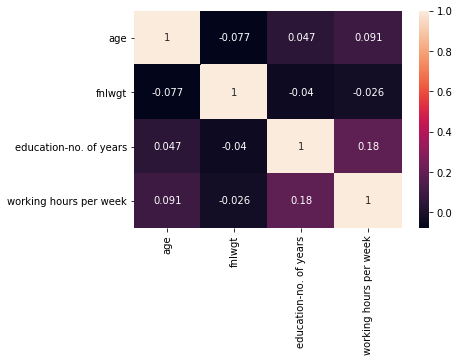

In [0]:
sns.heatmap(adult_data.corr(), annot=True)

There is hardly any correlation between the numeric variables

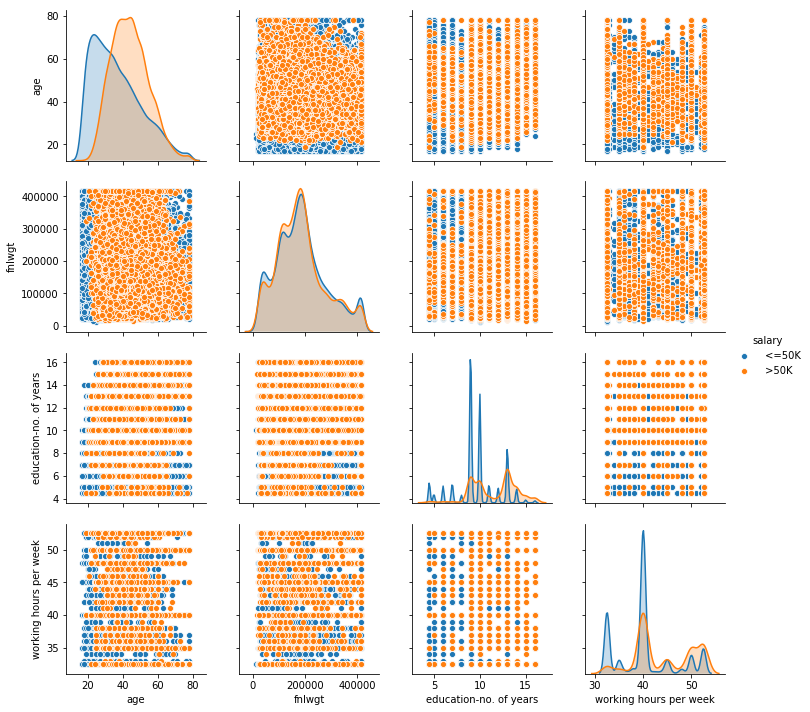

In [0]:
# Pairplot using sns
sns.pairplot(adult_data , hue='salary' , diag_kind = 'kde')

### Converting all objects to categorical codes

In [0]:
for feature in adult_data.columns: 
    if adult_data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(adult_data[feature].unique()))
        print(pd.Categorical(adult_data[feature].unique()).codes)
        adult_data[feature] = pd.Categorical(adult_data[feature]).codes



feature: workclass
[State-gov, Self-emp-not-inc, Private, Federal-gov, Local-gov, Unk, Self-emp-inc, Without-pay, Never-worked]
Categories (9, object): [Federal-gov, Local-gov, Never-worked, Private, ..., Self-emp-not-inc, State-gov, Unk, Without-pay]
[6 5 3 0 1 7 4 8 2]


feature: education
[Bachelors, HS-grad, 11th, Masters, 9th, ..., 5th-6th, 10th, 1st-4th, Preschool, 12th]
Length: 16
Categories (16, object): [10th, 11th, 12th, 1st-4th, ..., Masters, Preschool, Prof-school, Some-college]
[ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]


feature: marrital status
[Never-married, Married-civ-spouse, Divorced, Married-spouse-absent, Separated, Married-AF-spouse, Widowed]
Categories (7, object): [Divorced, Married-AF-spouse, Married-civ-spouse, Married-spouse-absent, Never-married, Separated, Widowed]
[4 2 0 3 5 1 6]


feature: occupation
[Adm-clerical, Exec-managerial, Handlers-cleaners, Prof-specialty, Other-service, ..., Tech-support, Unk, Protective-serv, Armed-Forces, Priv-house

In [0]:
adult_data.head()

,age,workclass,fnlwgt,education,education-no. of years,marrital status,occupation,relationship,race,sex,working hours per week,native-country,salary
0,39.0,6,77516.0,9,13.0,4,0,1,4,1,40.0,38,0
1,50.0,5,83311.0,9,13.0,2,3,0,4,1,32.5,38,0
2,38.0,3,215646.0,11,9.0,0,5,1,4,1,40.0,38,0
3,53.0,3,234721.0,1,7.0,2,5,0,2,1,40.0,38,0
4,28.0,3,338409.0,9,13.0,2,9,5,2,0,40.0,4,0


### Train Test Split

In [0]:
# Copy all the predictor variables into X dataframe
X = adult_data.drop('salary', axis=1)

# Copy target into the y dataframe. 
y = adult_data[['salary']]

In [0]:
# Split X and y into training and test set in 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)

### Logistic Regression Model

In [0]:
# Fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Predicting on Training and Test dataset

In [0]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### Getting the Predicted Classes and Probs

In [0]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.617829,0.382171
1,0.781338,0.218662
2,0.775134,0.224866
3,0.506296,0.493704
4,0.756056,0.243944


## Model Evaluation

In [0]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.7497406738637673

### AUC and ROC for the training data

AUC: 0.645


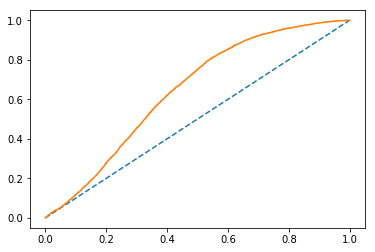

In [0]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [0]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.7639827904118008

### AUC and ROC for the test data

AUC: 0.645


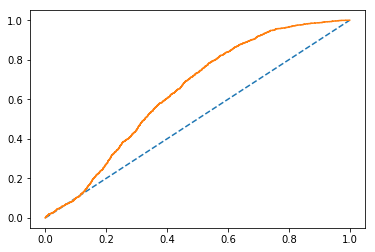

In [0]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

### Confusion Matrix for the training data

In [0]:
confusion_matrix(y_train, ytrain_predict)

array([[19397,   287],
       [ 6227,   118]], dtype=int64)

In [0]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86     19684
           1       0.29      0.02      0.03      6345

   micro avg       0.75      0.75      0.75     26029
   macro avg       0.52      0.50      0.45     26029
weighted avg       0.64      0.75      0.66     26029



### Confusion Matrix for test data

In [0]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[4942,   72],
       [1464,   30]], dtype=int64)

In [0]:
#Test Data Accuracy
test_acc=model.score(X_test,y_test)
test_acc

0.7639827904118008

In [0]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.99      0.87      5014
           1       0.29      0.02      0.04      1494

   micro avg       0.76      0.76      0.76      6508
   macro avg       0.53      0.50      0.45      6508
weighted avg       0.66      0.76      0.68      6508



# Conclusion

Accuracy on Test data is 76% and on Train data is 74%.  
AUC is 64% for both.   
Recall and Precision is low and same on both data.  
While the model results between training and test sets are similar, indicating no under or overfitting issues, overall prediction of the model is weaker in terms of predicting salary > 50k. Considering the class imabalance ratio is moderate and not high, with more training data, the model is expected to perform even better.

Note: Alternatively, one hot encoding can also be done instead of label encoding on categorical variables before building the logistic regression model. Do play around with these techniques using one hot encoding as well.

#Running IN Google Colab
Importing jupyter notebook
1. Login to Google
2. Go to drive.google.com
3. Upload jupyter notebook file into the drive
4. double click it, or right click -&gt; open with -&gt; google colaboratory
Alternatively,
1. Login to Google
2. Go to https://colab.research.google.com/notebooks/intro.ipynb#recent=true
3. Upload the jupyter notebook

Loading dataset into colab
#Use the below code to load the dataset
from google.colab import files
uploaded = files.upload() # upload file here from local
import io
df2 = pd.read_csv(io.BytesIO(uploaded[&#39;Filename.csv&#39;])) #give the filename in quotes

Go to Runtime > change Runtime type > check if it points to Python